## Problem 1

Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3   principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform  hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the   principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and   check if you’re getting similar results with and without PCA)  

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [122]:
sns.set()

### Data Dictionary

In [123]:
wine = pd.read_csv('wine.csv')

In [124]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [125]:
wine1 = wine.copy(deep=True)

### Exploratory Data Analysis

In [126]:
wine1.sample(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
139,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
30,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
129,2,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
34,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095


In [127]:
wine1.shape

(178, 14)

In [128]:
wine1.var()

Type                   0.600679
Alcohol                0.659062
Malic                  1.248015
Ash                    0.075265
Alcalinity            11.152686
Magnesium            203.989335
Phenols                0.391690
Flavanoids             0.997719
Nonflavanoids          0.015489
Proanthocyanins        0.327595
Color                  5.374449
Hue                    0.052245
Dilution               0.504086
Proline            99166.717355
dtype: float64

In [129]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [130]:
wine1.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Imputation not needed

In [131]:
wine1.duplicated().sum()

0

#### Univariate analysis

##### Moments

In [132]:
wine1.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


we can see that the mean has varied range. We would want to Normalize the data.

In [133]:
#Fisher's Kurtosis
wine1.kurt(axis=0)

Type              -1.322787
Alcohol           -0.852500
Malic              0.299207
Ash                1.143978
Alcalinity         0.487942
Magnesium          2.104991
Phenols           -0.835627
Flavanoids        -0.880382
Nonflavanoids     -0.637191
Proanthocyanins    0.554649
Color              0.381522
Hue               -0.344096
Dilution          -1.086435
Proline           -0.248403
dtype: float64

In [134]:
#skew
wine1.skew(axis=0)

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

##### Distributions

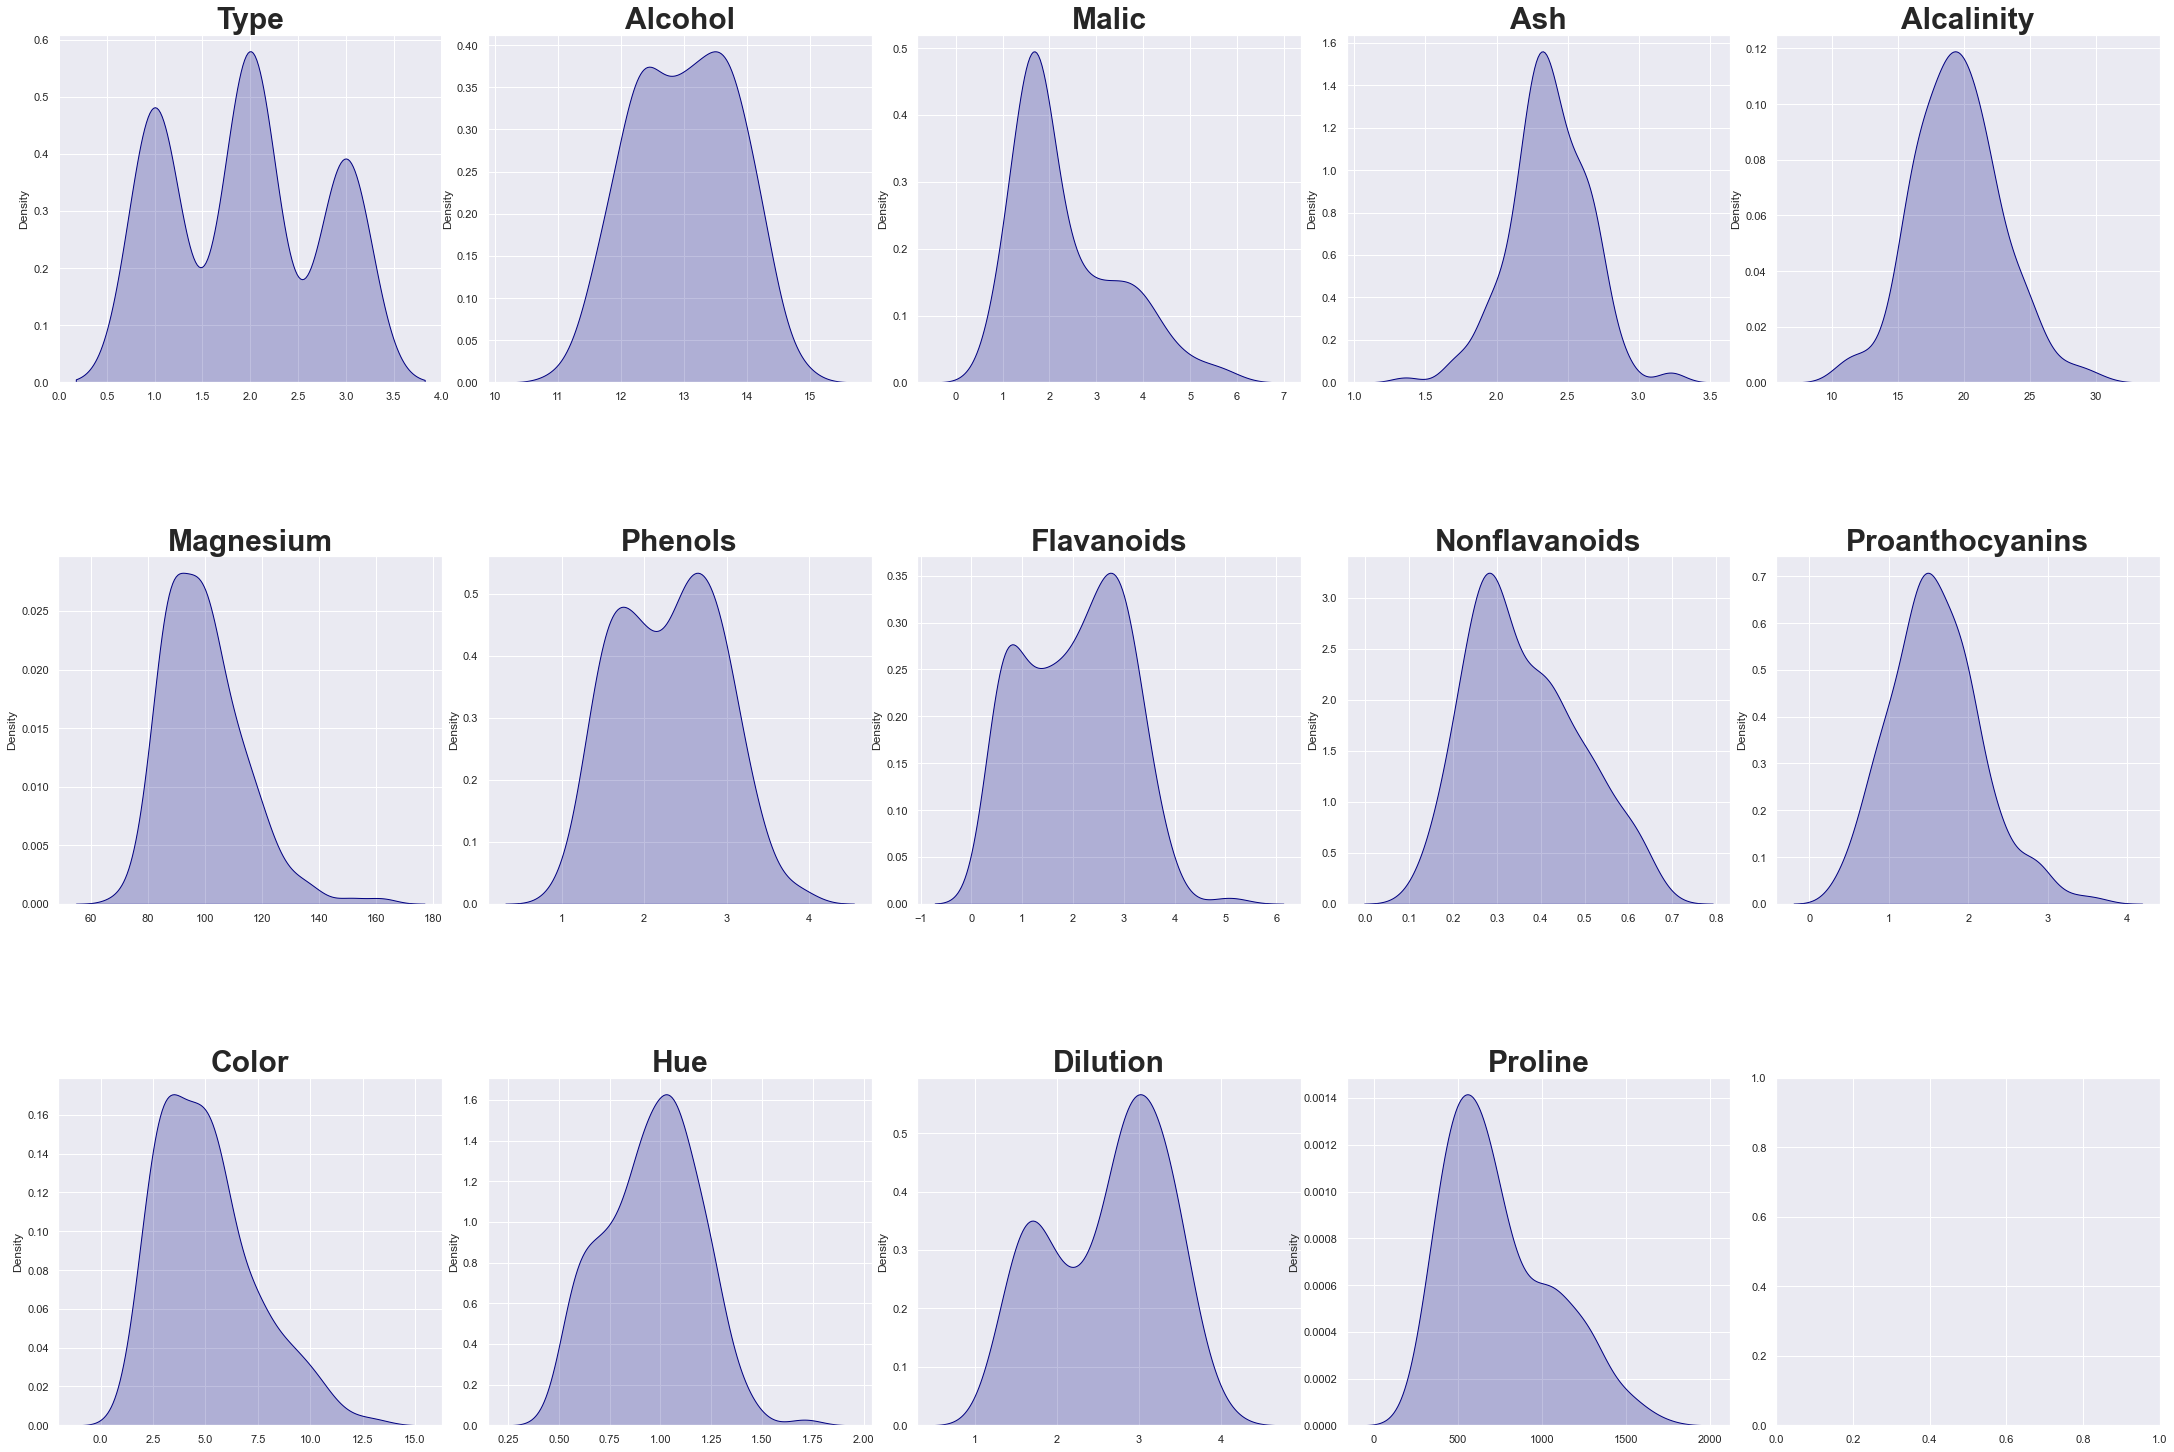

In [135]:
#display distributions for numeric data
fig, axes = plt.subplots(3, 5, sharex=False, figsize=(30,20))
fig.tight_layout()
axeslist = [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[0,4],axes[1,0],axes[1,1],axes[1,2],axes[1,3],axes[1,4],
           axes[2,0],axes[2,1],axes[2,2],axes[2,3],axes[2,4]]
j=0
for col in wine1.columns:
    p= sns.kdeplot(data=wine1, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=30)
    j= j+1

**Observations:**  
    * color, malic and proline are right skewed  
    * dilution , flavanoids and phenol are bimodal 


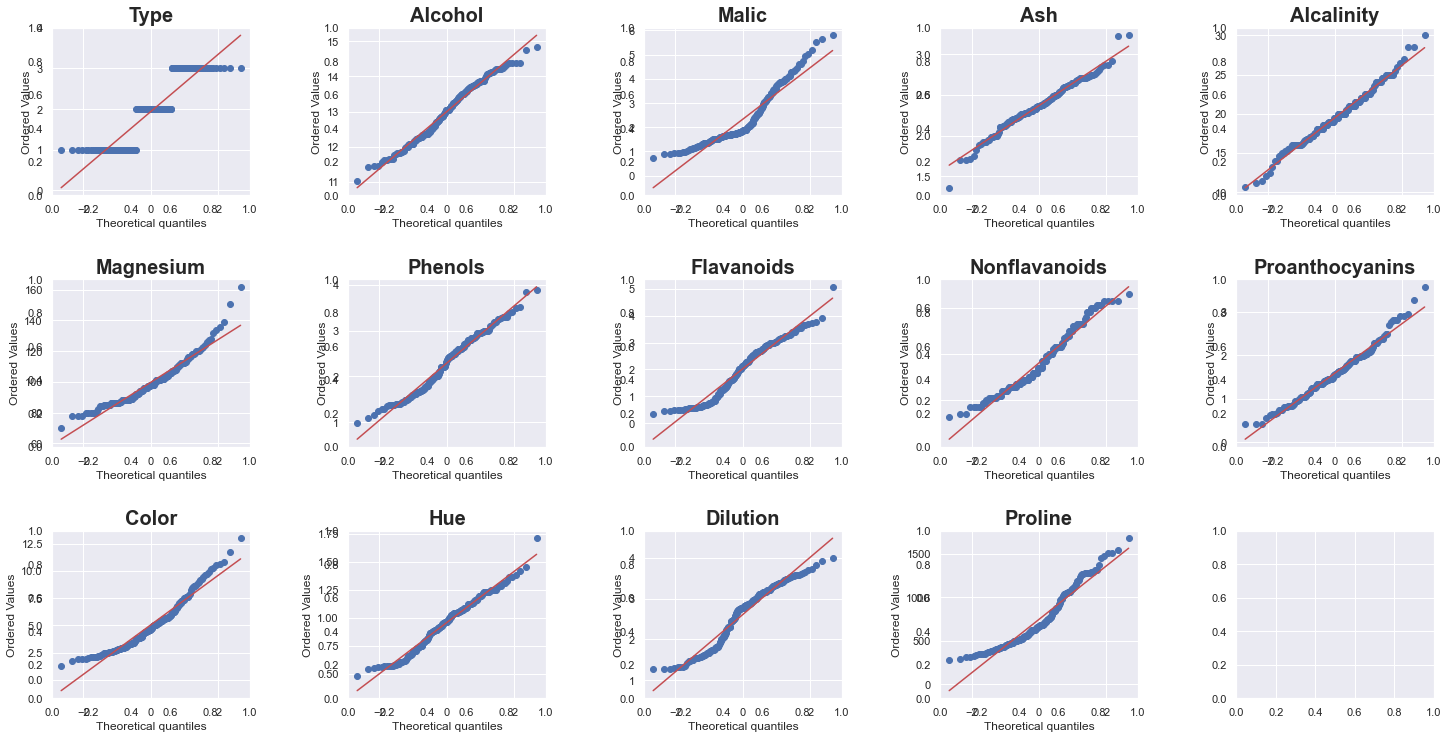

In [136]:
#Review QQ Plot for other normally distributed columns
import scipy.stats as stats
import pylab
fig, axes = plt.subplots(3, 5, sharex=False, figsize=(20,10))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
j=0

for col in wine1.columns:
    ax = fig.add_subplot(3, 5, nfig[j])
    p=stats.probplot(wine1[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1


**Observations:**  
    * Alcalinity seem normally distributed   
    * We will apply 'yeo-johnson' PowerTransformer on the non gaussian features when we create pipeline. 

In [137]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(df.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [138]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(wine1)

,column,stat,p,Distribution
0,Type,0.804213,3.526998e-14,Not Gaussian
1,Alcohol,0.981805,2.005172e-02,Not Gaussian
2,Malic,0.888784,2.945930e-10,Not Gaussian
3,Ash,0.983947,3.868526e-02,Not Gaussian
4,Alcalinity,0.990225,2.638694e-01,Gaussian
5,Magnesium,0.938331,6.345416e-07,Not Gaussian
6,Phenols,0.976682,4.395752e-03,Not Gaussian
7,Flavanoids,0.954527,1.679064e-05,Not Gaussian
8,Nonflavanoids,0.962522,1.055266e-04,Not Gaussian
9,Proanthocyanins,0.980723,1.445338e-02,Not Gaussian


##### Outlier Treatment

In [139]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
wine1_norm= pd.DataFrame(scalerMM.fit_transform(wine1))
wine1_norm.columns=wine1.columns


In [140]:
wine1_norm.sample(4)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
83,0.5,0.531579,0.616601,0.513369,0.613402,0.163043,0.231034,0.263713,0.905660,0.381703,0.300341,0.292683,0.271062,0.169044
117,0.5,0.365789,0.171937,0.443850,0.613402,0.413043,0.351724,0.369198,0.396226,0.378549,0.066553,0.471545,0.619048,0.047789
159,1.0,0.644737,0.183794,0.684492,0.613402,0.206522,0.558621,0.160338,0.735849,0.593060,0.893345,0.073171,0.186813,0.243937
126,0.5,0.368421,0.156126,0.497326,0.561856,0.173913,0.606897,0.592827,0.490566,0.429022,0.226962,0.170732,0.575092,0.052782


<AxesSubplot:>

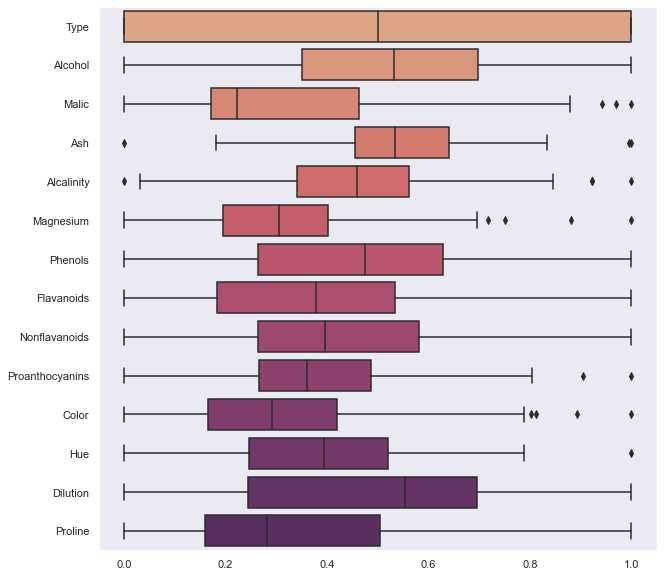

In [141]:
#View outliers for non Gaussian distributions
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.boxplot(data=wine1_norm, orient="h", palette = 'flare')

In [142]:
#function to get outliers from all numeric features
def IQR_Outliers (X, features):
    
    Outlier_df = pd.DataFrame()
    ulimit=[]
    llimit=[]
    no_of_outliers =[]
    perc = []
    feature = []


    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        feature.append(col)        
        ulimit.append(upper)
        llimit.append(lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        

        no_of_outliers.append(len(outliers))
        perc.append(round((len(outliers)*100)/len(indices),2))

        out_indexlist.extend(outliers_index)
    
    Outlier_df['feature'] = feature
    Outlier_df['no_of_outliers']= no_of_outliers 
    Outlier_df['percentage']= perc
    Outlier_df['upper_limit']= ulimit
    Outlier_df['lower_limit']= llimit
                   
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    return Outlier_df   


In [143]:
#get outliers from all numeric features
IQR_Outliers(wine1, wine1.columns)

Number of samples:  178

Number of rows with outliers:  17


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,Type,0,0.00,6.00000,-2.00000
1,Alcohol,0,0.00,15.65000,10.39000
2,Malic,3,1.69,5.30250,-0.61750
3,Ash,3,1.69,3.07875,1.68875
4,Alcalinity,4,2.25,27.95000,10.75000
5,Magnesium,4,2.25,135.50000,59.50000
6,Phenols,0,0.00,4.38625,0.15625
7,Flavanoids,0,0.00,5.38000,-1.30000
8,Nonflavanoids,0,0.00,0.68875,0.01875
9,Proanthocyanins,2,1.12,3.00000,0.20000


7 columns containing outliers

### Multivariate Analysis

#### Pair-wise Scatter Plots

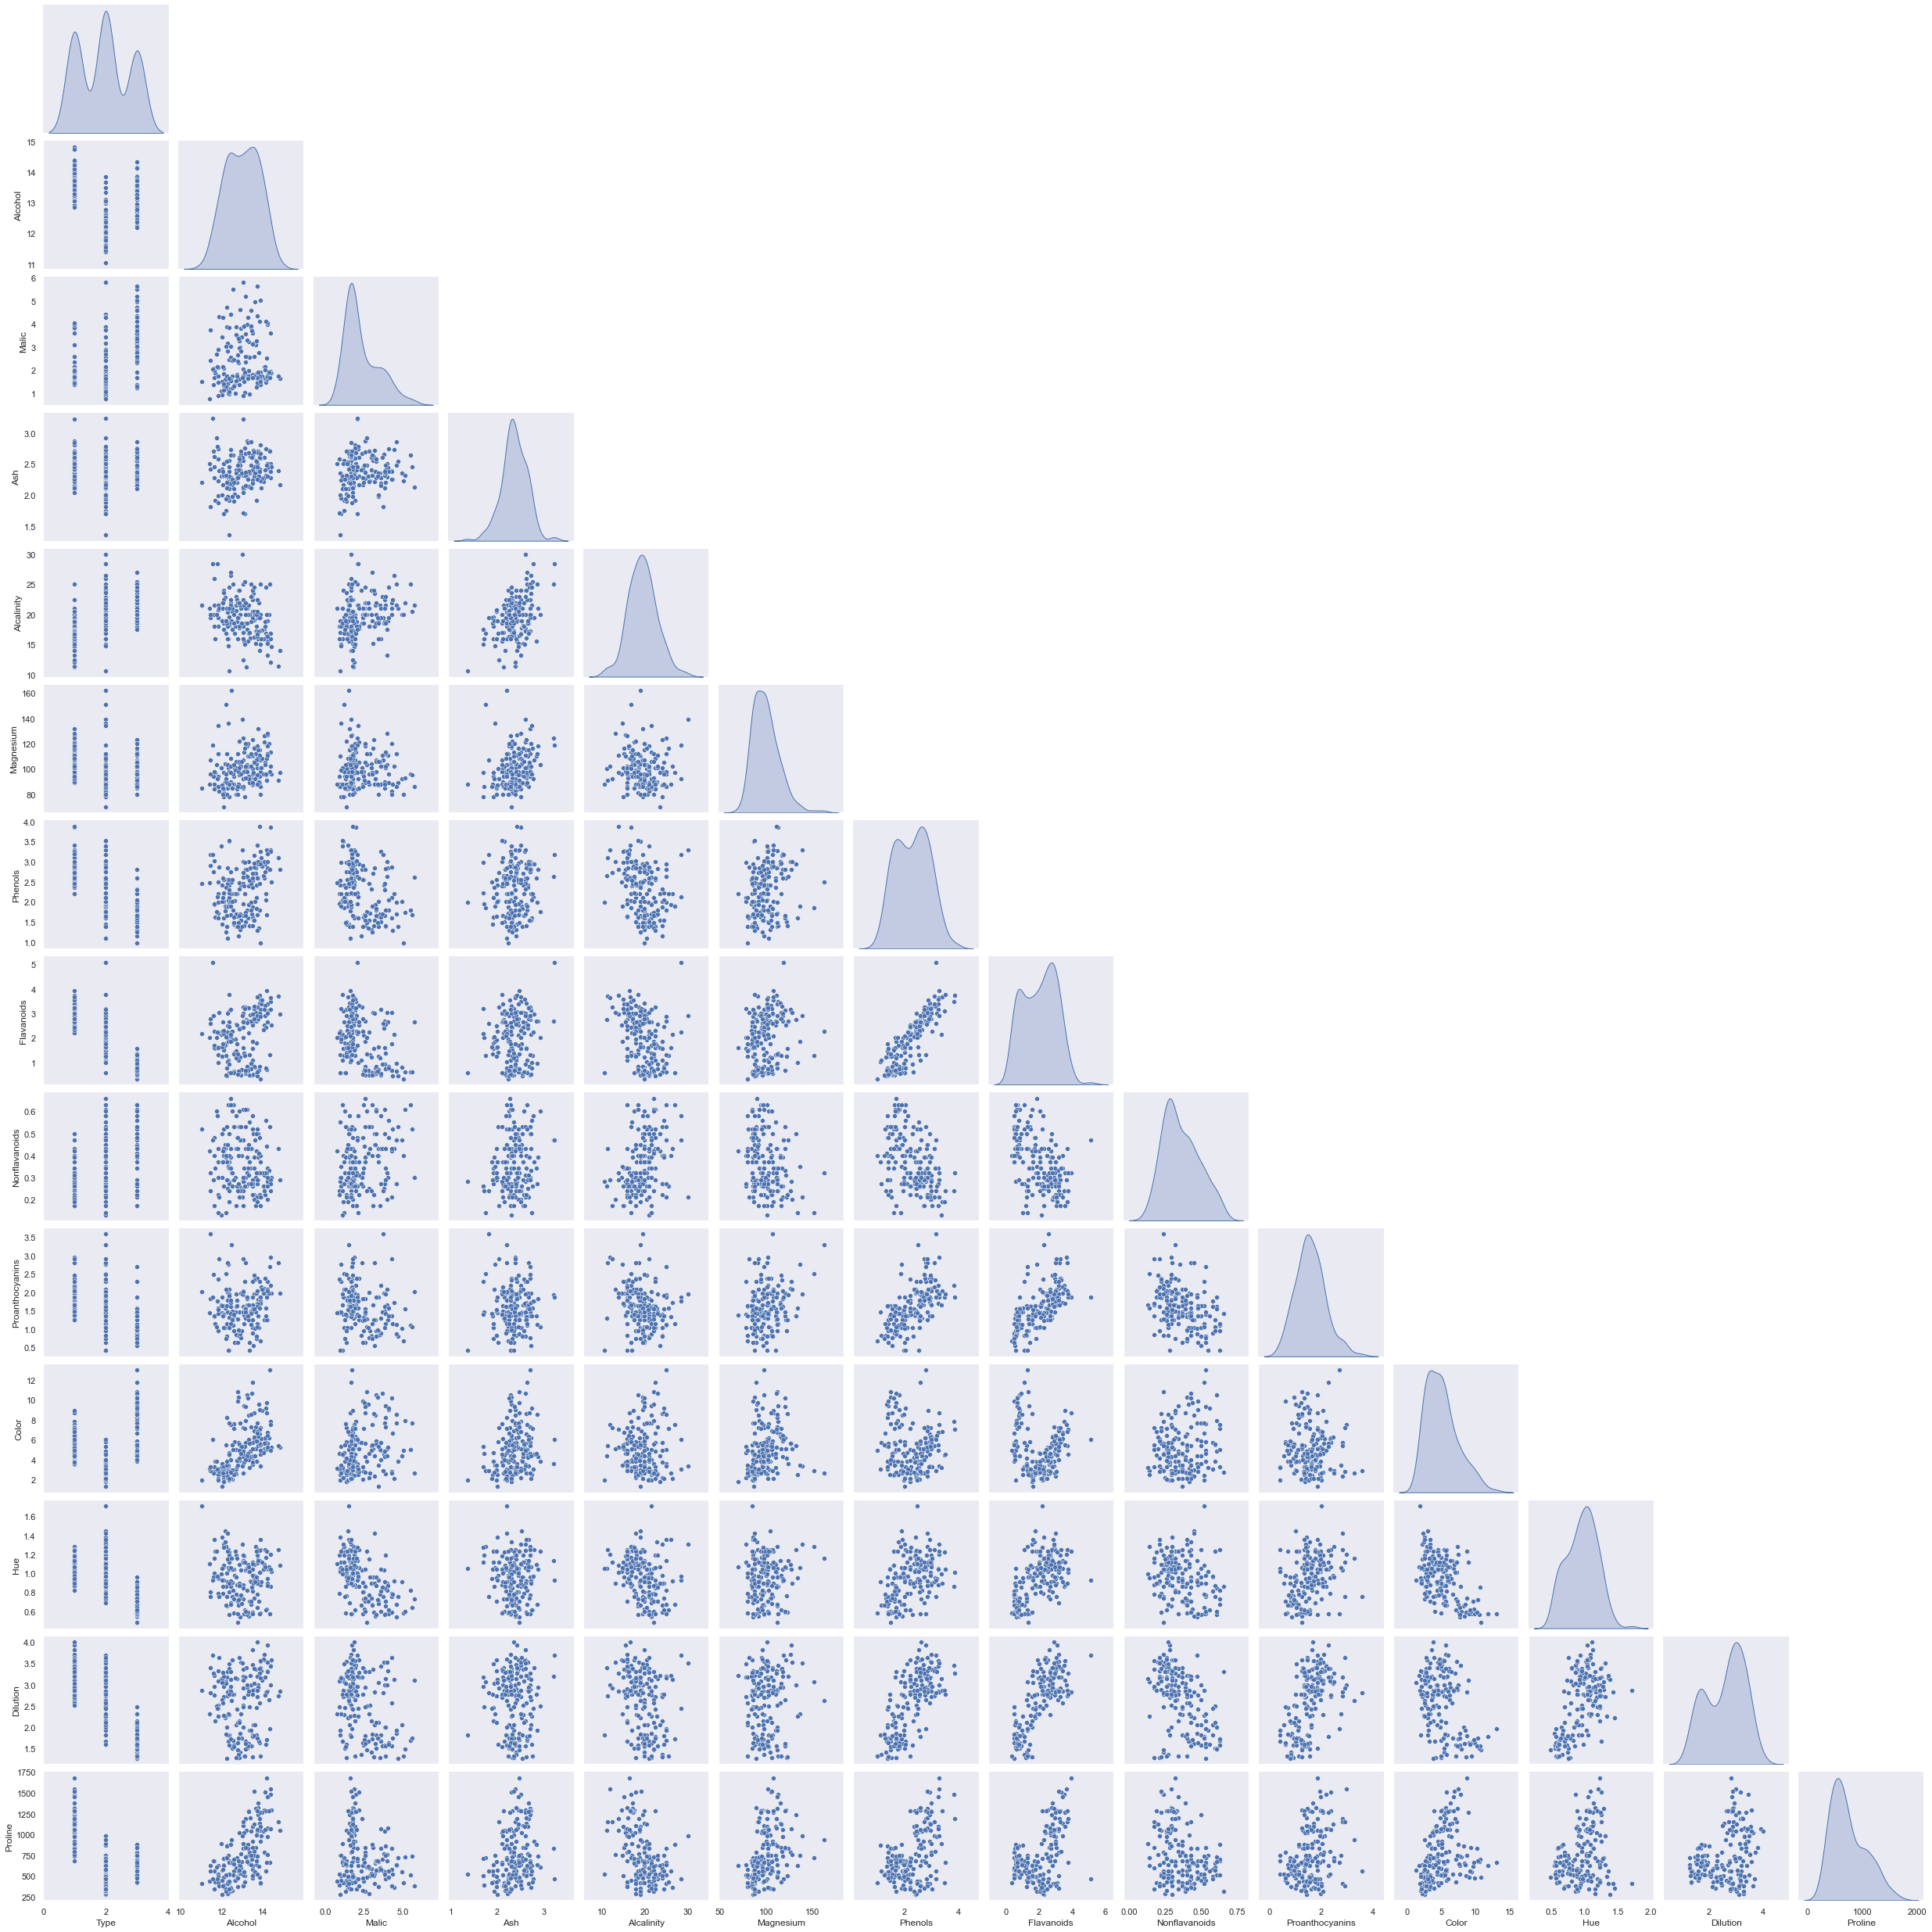

In [144]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,20
sns.pairplot(wine1,diag_kind="kde", diag_kws=dict(shade=True),corner=True)
#fig.suptitle('Airline Attributes Pairwise Plots', fontsize=14)

#### Triangular Heat Map

<AxesSubplot:>

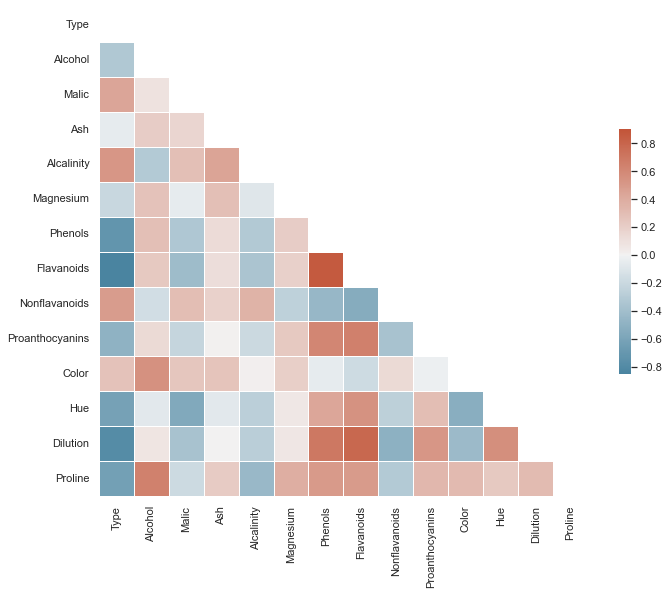

In [145]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(wine1.corr(), dtype=bool))

corr= wine1.corr(method ='pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation matrix

In [146]:
wine1.corr(method ='pearson')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [147]:
#Get only highly correlated items

df = wine1.corr().abs().round(1)
df = wine1.corr().round(1)
for column in df:
    ac = df[column].round(1)
    replace_col = df[((ac < 0.5) & (ac >= 0))| ((ac > -0.5) & (ac <= 0))].index
    df.at[replace_col, column]='blah'
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.0,blah,blah,blah,0.5,blah,-0.7,-0.8,0.5,-0.5,blah,-0.6,-0.8,-0.6
Alcohol,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,0.5,blah,blah,0.6
Malic,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,-0.6,blah,blah
Ash,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah,blah
Alcalinity,0.5,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah
Magnesium,blah,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah
Phenols,-0.7,blah,blah,blah,blah,blah,1.0,0.9,blah,0.6,blah,blah,0.7,0.5
Flavanoids,-0.8,blah,blah,blah,blah,blah,0.9,1.0,-0.5,0.7,blah,0.5,0.8,0.5
Nonflavanoids,0.5,blah,blah,blah,blah,blah,blah,-0.5,1.0,blah,blah,blah,-0.5,blah
Proanthocyanins,-0.5,blah,blah,blah,blah,blah,0.6,0.7,blah,1.0,blah,blah,0.5,blah


**Observations**  
* We can see that phenols and flavanoids are highly correlated


### Data Preprocessing

In [148]:
from sklearn.base import BaseEstimator,TransformerMixin
class OutlierCapper(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_cap(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        X.loc[(X < lower_bound)] = lower_bound 
        X.loc[(X > upper_bound)] = upper_bound 
        return pd.Series(X)
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X.apply(self.outlier_cap)

In [149]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder  
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline


features_with_outliers = ['Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Proanthocyanins', 'Color', 'Hue']

non_gaussian_features = ['Type', 'Alcohol', 'Malic', 'Ash', 'Magnesium', 'Phenols','Flavanoids', 
                         'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']


gauss_outlier_transformer = make_column_transformer(
    (PowerTransformer(method='yeo-johnson', standardize=False), non_gaussian_features),
    (OutlierCapper(), features_with_outliers),
)


preprocessor = ColumnTransformer(
    transformers=[
        ("gauss_outlier", gauss_outlier_transformer, wine1.columns),
    ]
)
scaler = ColumnTransformer(
    transformers=[
        ("scaling", MinMaxScaler(), slice(0,14)),
    ]
)

### Create Preprocessing Pipeline

In [150]:
# We will later Append classifier to preprocessing pipeline.
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("scaling", scaler)]
)

In [151]:
# Apply the tranformation
wine1_transformed = pipe.fit_transform(wine1) 

In [152]:
wine1.shape

(178, 14)

In [153]:
wine1_transformed.shape

(178, 14)

In [154]:
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, wine1.shape, wine1_transformed.shape))

(0, 0)

In [155]:
# View sample records after transformation
wine1_transformed[0,:]

array([0.        , 0.83683037, 0.45765166, 0.53159388, 0.82058307,
       0.66497476, 0.61434612, 0.39323202, 0.68838952, 0.61447929,
       0.46541146, 0.96384995, 0.76391597, 0.21260274])

In [156]:
# View Tranformation steps
pipe.named_steps

{'preprocessor': ColumnTransformer(transformers=[('gauss_outlier',
                                  ColumnTransformer(transformers=[('powertransformer',
                                                                   PowerTransformer(standardize=False),
                                                                   ['Type',
                                                                    'Alcohol',
                                                                    'Malic',
                                                                    'Ash',
                                                                    'Magnesium',
                                                                    'Phenols',
                                                                    'Flavanoids',
                                                                    'Nonflavanoids',
                                                                    'Proanthocyanins',
                     

### Model Building

#### Agglomerative Clustering

##### View Dendrogram

In [157]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

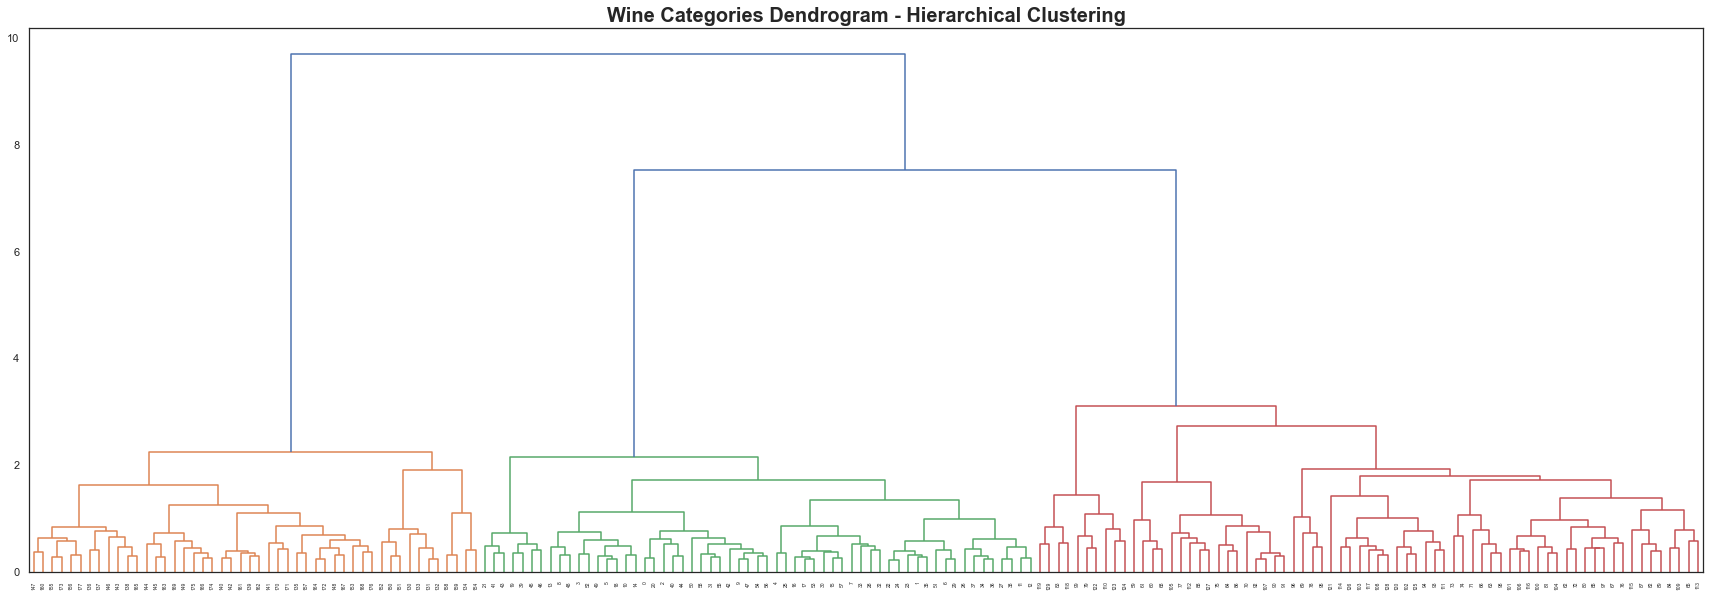

In [158]:
Z = linkage(wine1_transformed, method = "ward", metric = "euclidean")
plt.figure(figsize=(30, 10))
plt.title("Wine Categories Dendrogram - Hierarchical Clustering",fontsize=20,fontweight="bold")
dend = shc.dendrogram(Z)

In [159]:
#Function to plot truncated dendrogram
def plot_dendrogram(model, **kwargs):
  
    count = np.zeros(model.children_.shape[0])
    nsamples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        currentcount = 0
        for child_idx in merge:
            if child_idx < nsamples:
                currentcount += 1  
            else:
                currentcount += count[child_idx - nsamples]
        count[i] = currentcount

    linkagematrix = np.column_stack(
        [model.children_, model.distances_, count]
    ).astype(float)
    dendrogram(linkagematrix, **kwargs)    

##### Evaluate with Hyperparameters

We will evaluate the clustering fit based on the scores below, by tuning hyperparameters - number of clusters and Linkage.

###### Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score

(Reference : https://scikit-learn.org/)

* **The Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance    (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between     a sample and the nearest cluster that sample is not part of    
* **Calinski Harabasz Score** The score is defined as ratio between the within-cluster dispersion and the between-cluster            dispersion  
* **Davies Bouldin Score** The score is defined as the average similarity measure of each cluster with its most similar             cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are       farther apart and less dispersed will result in a better score.    
* **Cophenetic Correlation Coefficient:** If the cluster is good then the linking of objects in the cluster tree should have a     strong correlation with the distances between objects in the distance vector.

In [160]:
from sklearn.metrics import silhouette_score ,calinski_harabasz_score , davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Defining a function to find the optimal number of clusters' n_clusters parameter
# Note that we are using a dataset that contains only numeric features. 

def agglomerationScorecard(transformed_df):
    arr = np.empty((10, 10), dtype=object)
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5]
    linkages = ['ward','average','complete','single']
    silhouette_scores = []
    cal_har_scores =[]
    dav_boulds =[]
    clusters=[]
    linkages1 = []
    totals = []
    cophenetics=[]
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    for n_clusters in range_n_clusters:
         for link in linkages:                      
            cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=link)
            labels_ = cluster.fit_predict(transformed_df)
            silhouette_avg = silhouette_score(transformed_df, labels_)
            cal_har_score = calinski_harabasz_score(transformed_df, labels_)
            dav_bould = davies_bouldin_score(transformed_df, labels_) 
            Z = linkage(transformed_df, method = link, metric = 'euclidean')
            cophenetic, coph_dists = cophenet(Z, pdist(transformed_df))
            clusters.append(n_clusters)
            linkages1.append(link)
            silhouette_scores.append(silhouette_avg)
            cal_har_scores.append(cal_har_score)
            dav_boulds.append(dav_bould)
            totals.append(silhouette_avg + cal_har_score + dav_bould )
            cophenetics.append(cophenetic) 
    scorecard['clusters'] = clusters
    scorecard['linkage'] = linkages1
    scorecard['silhouette'] = silhouette_scores
    scorecard['calinski_harabasz'] =cal_har_scores
    scorecard['davies_bouldin']  = dav_boulds
    scorecard['Total']  = totals
    scorecard['cophenetic']  = cophenetics
    return scorecard

In [161]:
# View the total of silhouette calinski_harabasz_score and davies_bouldin_score from highest to lowest scores
# View cophenetic coefficient for the same
s= agglomerationScorecard(wine1_transformed)
s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s

,clusters,linkage,silhouette,calinski_harabasz,davies_bouldin,Total,cophenetic
0,3,ward,0.373743,121.306065,1.110704,122.790512,0.801786
1,2,ward,0.351171,100.051377,1.044591,101.447139,0.801786
2,2,average,0.351171,100.051377,1.044591,101.447139,0.841458
3,2,complete,0.351171,100.051377,1.044591,101.447139,0.809239
4,4,complete,0.329307,93.915021,1.423294,95.667622,0.809239
5,4,ward,0.346522,93.894684,1.274397,95.515602,0.801786
6,3,complete,0.320831,93.075792,1.306645,94.703268,0.809239
7,4,average,0.363798,83.553949,0.965561,84.883307,0.841458
8,5,ward,0.308206,79.289452,1.463988,81.061647,0.801786
9,5,complete,0.296070,75.740657,1.561571,77.598298,0.809239


**Observations:**  
* We find the top record with ward linkage with 3 clusters (silhoutte = 0.37).    


###### Agglomerative: Three Clusters

In [162]:
cluster = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(wine1_transformed)

In [163]:
# Data points spread
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [164]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 71],
       [ 1, 48],
       [ 2, 59]], dtype=int64)

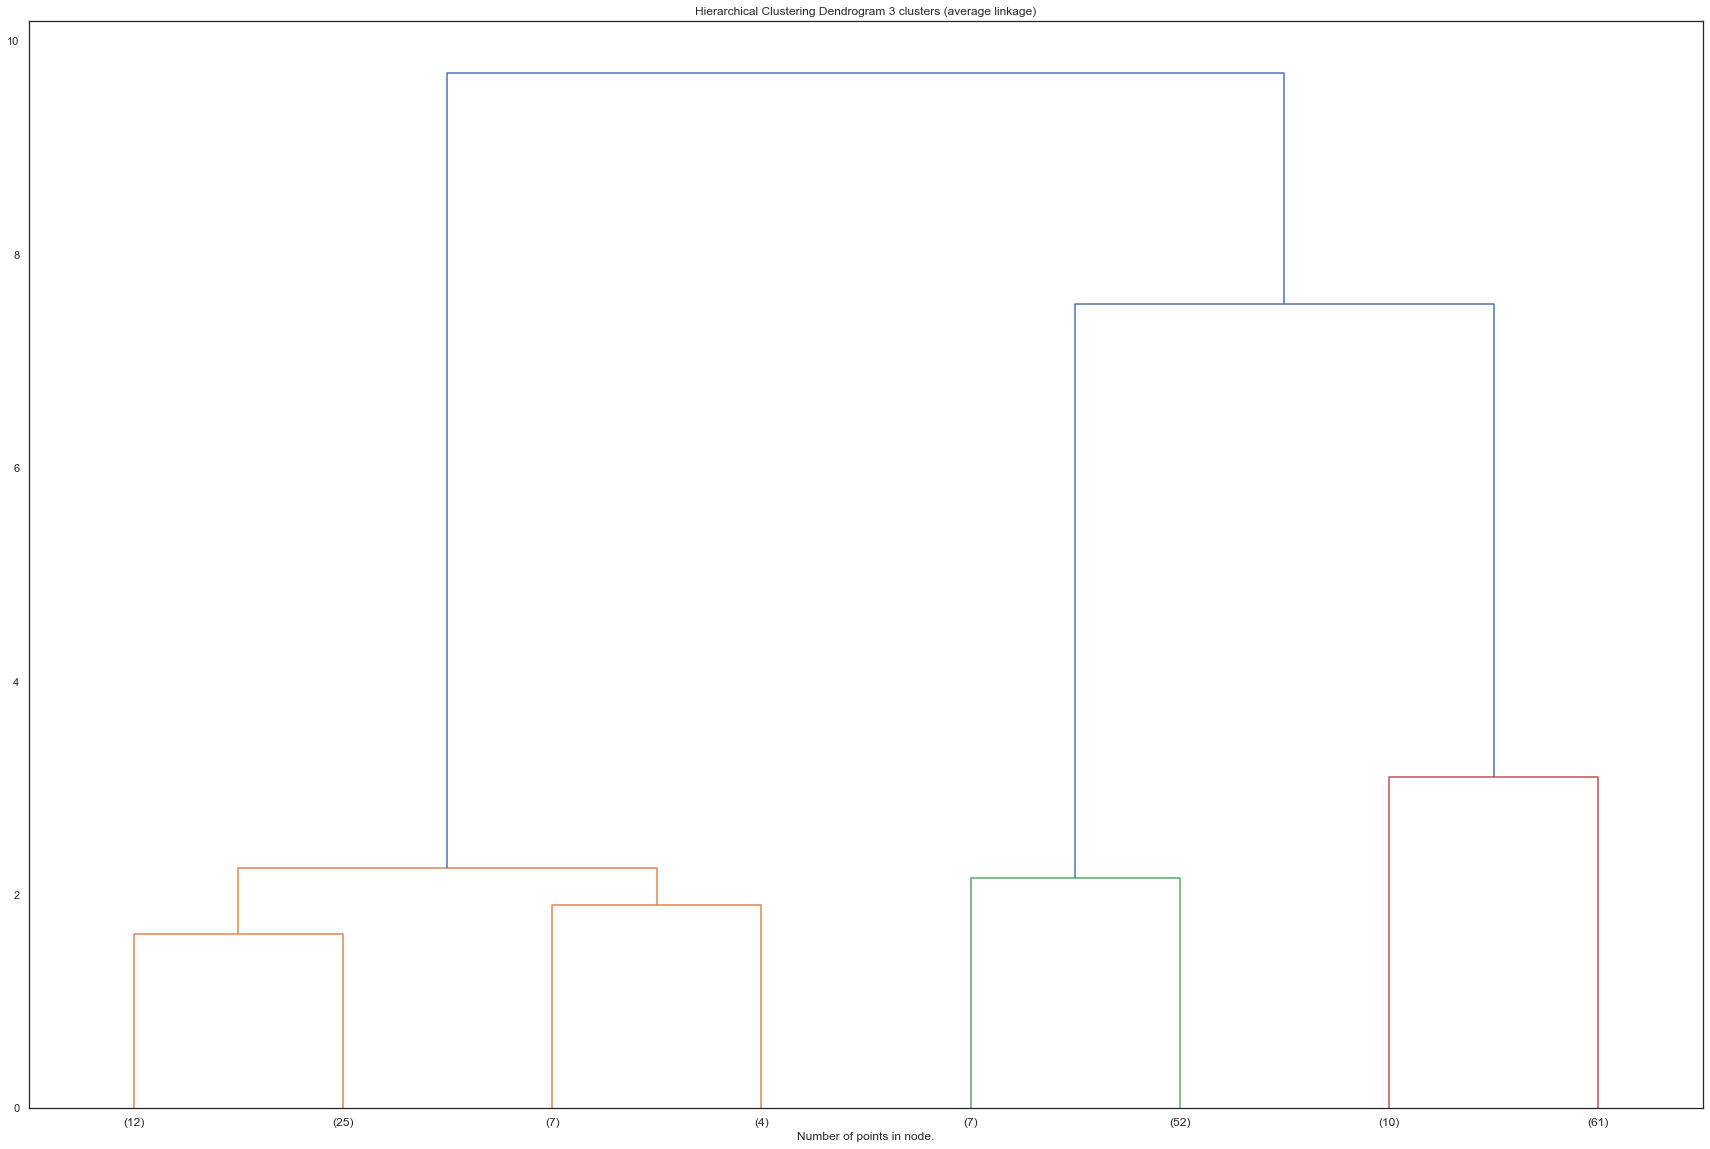

In [165]:
from scipy.cluster.hierarchy import dendrogram
plt.title("Hierarchical Clustering Dendrogram 3 clusters (average linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=2)
plt.xlabel("Number of points in node.")
plt.show()

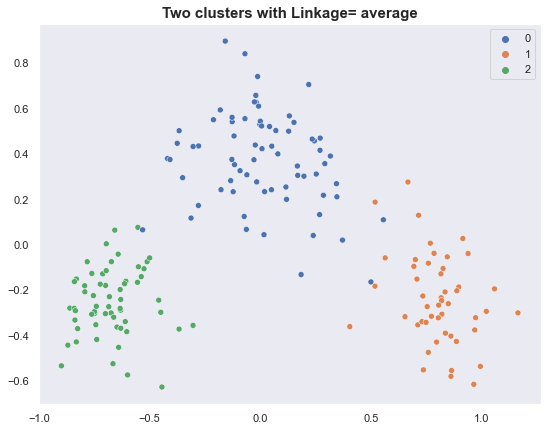

In [166]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=2)
auto_pca = pca.fit_transform(wine1_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=auto_pca[:,0], y=auto_pca[:,1],palette="deep")
plt.title("Two clusters with Linkage= average",fontsize=15,fontweight="bold")
plt.show()

#### K Means Clustering

##### Evaluate k with Elbow Graph

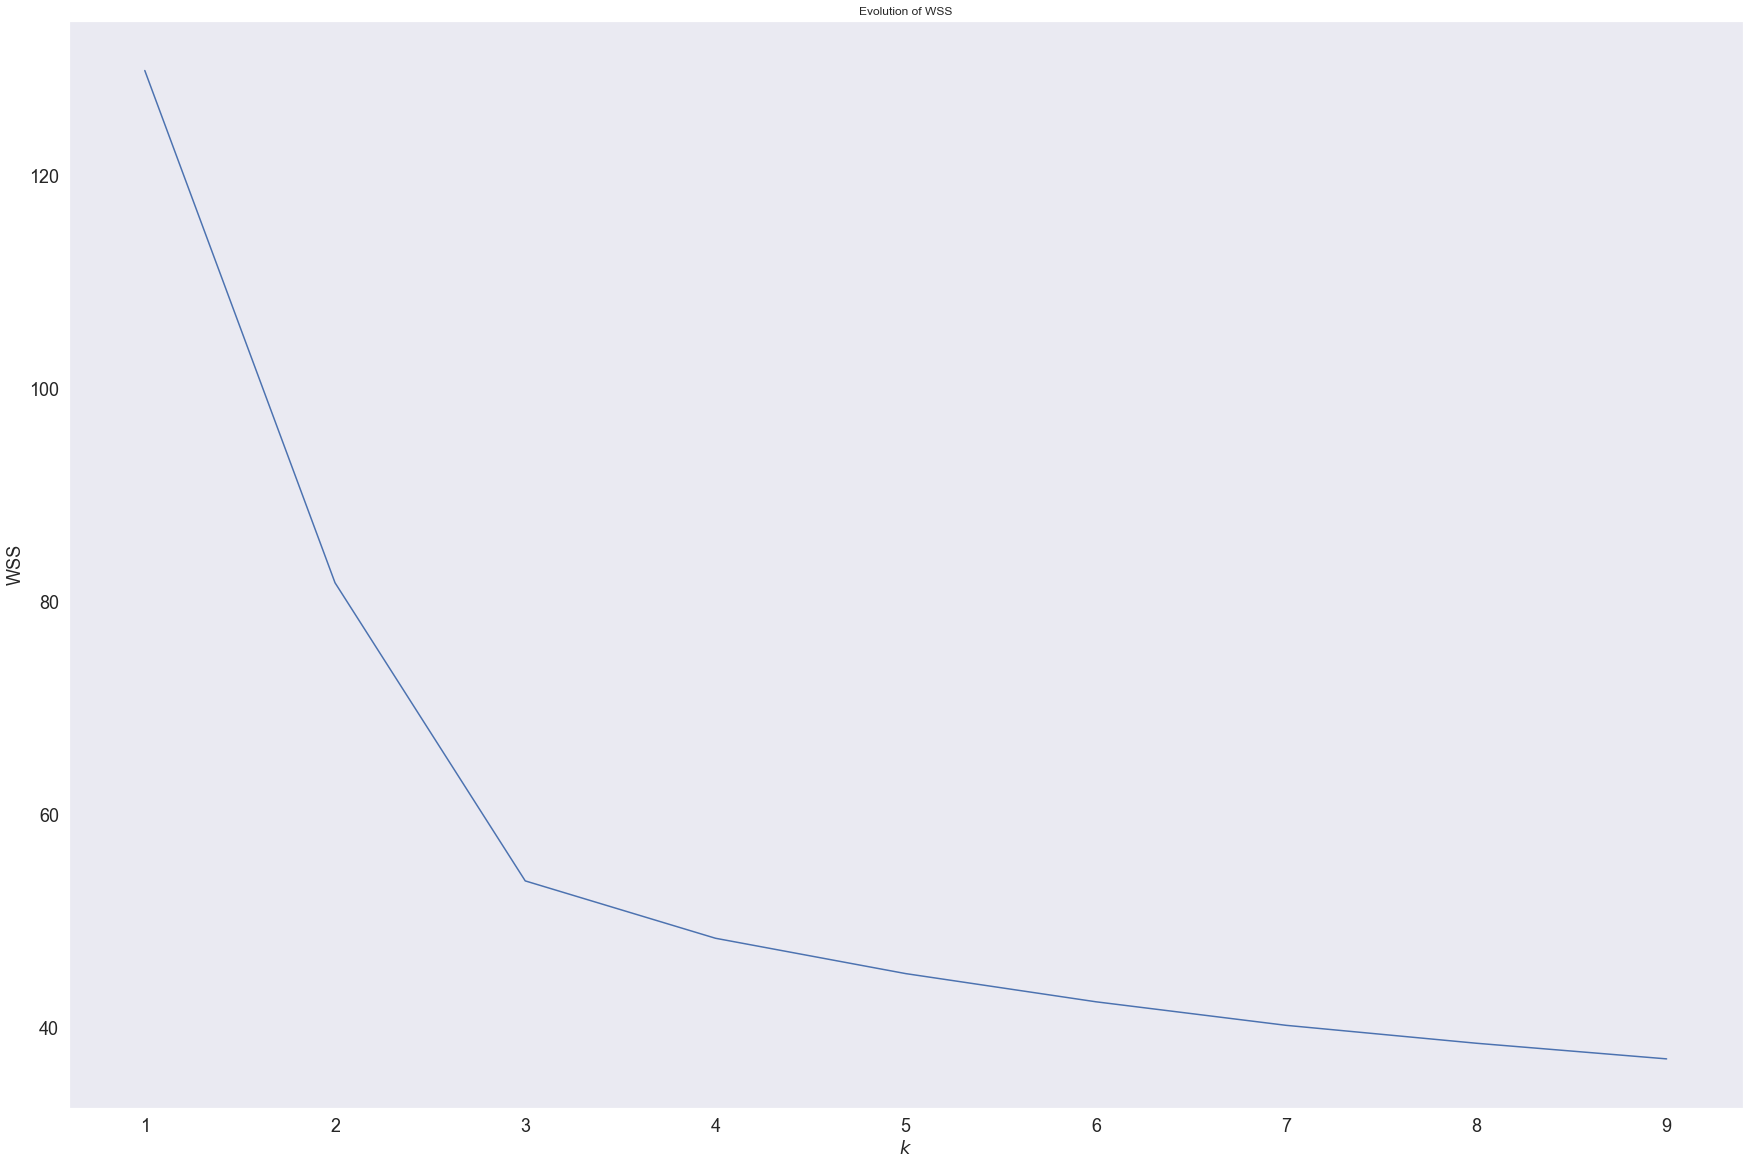

In [167]:
from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(init = 'k-means++',n_clusters=iter, random_state=2)
    kmeans.fit(wine1_transformed)
    y_kmeans = kmeans.predict(wine1_transformed)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS",fontsize=18)
plt.xlabel("$k$",fontsize=18)
plt.xticks(k,fontsize=18)
plt.yticks(fontsize=18)
plt.show()

based on elbow graph the optima is at 3 clusters

##### Apply K Means clustering

In [168]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=3, random_state=2)
kmeans.fit(wine1_transformed)
labels_ = kmeans.predict(wine1_transformed)

In [169]:
# Data points spread
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [170]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 50],
       [ 1, 60],
       [ 2, 68]], dtype=int64)

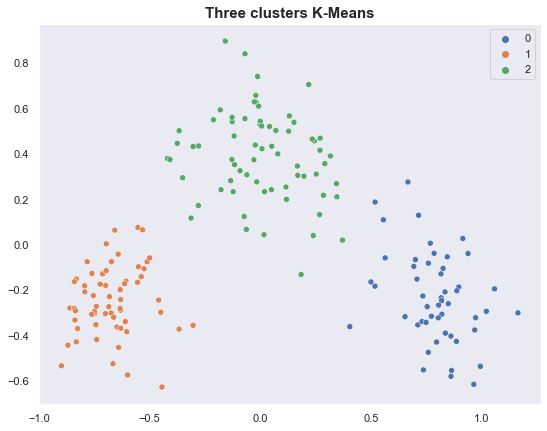

In [171]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=2)
wine_pca = pca.fit_transform(wine1_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=kmeans.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Three clusters K-Means",fontsize=15,fontweight="bold")
plt.show()

#### PCA on original Dataset

In [172]:
from sklearn.decomposition import PCA

In [173]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(wine1_transformed)

# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.48546616, 0.1745557 , 0.09281308])

In [174]:
# PCA weights
pca.components_

array([[ 0.62075731, -0.11152433,  0.18853321, -0.01042491, -0.07230828,
        -0.29881972, -0.33564107,  0.22778011, -0.19551229,  0.0544909 ,
        -0.20659497, -0.35579314, -0.21338768,  0.22695805],
       [ 0.13377943, -0.45800215, -0.37425775, -0.170359  , -0.21329023,
        -0.06236545, -0.00621138, -0.00893876, -0.03240893, -0.44521895,
         0.21840262,  0.10901647, -0.40083889, -0.36635914],
       [-0.0865122 , -0.20721044,  0.5023869 ,  0.01869256, -0.12551987,
         0.10732787,  0.14218614, -0.05302613,  0.14415518, -0.32329098,
        -0.02859651,  0.3620359 , -0.29317907,  0.55081284]])

In [175]:
# PCA shape
pca_values.shape

(178, 3)

In [176]:
wine1.shape

(178, 14)

In [177]:
# PCA scores
pca_values

array([[-8.59593319e-01, -2.79911268e-01, -8.35877016e-03],
       [-6.41173806e-01, -4.22515679e-02, -3.28749477e-03],
       [-6.73007337e-01, -3.01583108e-01,  1.34720305e-01],
       [-8.97673391e-01, -5.34384182e-01, -5.84053637e-02],
       [-4.57971678e-01, -2.44979692e-01,  1.78522787e-01],
       [-7.38018349e-01, -4.18288314e-01, -2.07490944e-01],
       [-6.98637813e-01, -3.04403847e-01, -5.00867171e-02],
       [-6.46503796e-01, -3.63487643e-01, -2.00075095e-02],
       [-6.83651300e-01, -2.73695823e-01, -1.91962308e-01],
       [-8.29822425e-01, -1.51867817e-01, -1.56947401e-01],
       [-8.24370933e-01, -3.70512852e-01, -1.57699199e-02],
       [-6.06203478e-01, -1.61485778e-01, -2.78821532e-01],
       [-6.32099253e-01, -1.98326091e-01, -1.51336047e-01],
       [-7.47107056e-01, -3.02849300e-01, -1.41603368e-01],
       [-8.68379215e-01, -4.43203967e-01, -1.32286340e-01],
       [-6.61361263e-01, -3.20073185e-01, -2.04036556e-01],
       [-6.39045148e-01, -4.52871524e-01

##### Agglomerative Clustering on PCA data

In [178]:
# View the total of silhouette calinski_harabasz_score and davies_bouldin_score from highest to lowest scores
# View cophenetic coefficient for the same
s= agglomerationScorecard(pca_values)
s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s

,clusters,linkage,silhouette,calinski_harabasz,davies_bouldin,Total,cophenetic
0,3,ward,0.556816,299.963010,0.659360,301.179186,0.838389
1,3,complete,0.548185,289.708592,0.671401,290.928178,0.835452
2,3,average,0.544041,280.799980,0.685791,282.029811,0.841409
3,4,ward,0.522480,269.569982,0.756417,270.848879,0.838389
4,4,complete,0.522377,248.289358,0.728341,249.540076,0.835452
5,5,average,0.486536,241.181488,0.807429,242.475452,0.841409
6,4,average,0.493650,234.918210,0.782008,236.193868,0.841409
7,5,ward,0.491922,232.116152,0.741571,233.349644,0.838389
8,5,complete,0.463482,208.341749,0.797992,209.603224,0.835452
9,4,single,0.492978,193.109797,0.606008,194.208783,0.810555


**Observations:**  
* We find the top record with ward linkage with 3 clusters has silhoutte = 0.55 compared to silhoutte = 0.37 without PCA.
* 3 clusters with ward linkage is the winner with and without PCA.

In [179]:
cluster = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(pca_values)

In [180]:
# Data points spread
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [181]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 68],
       [ 1, 50],
       [ 2, 60]], dtype=int64)

71,48,59 without PCA. We observe minimal variation in the distribution across clusters

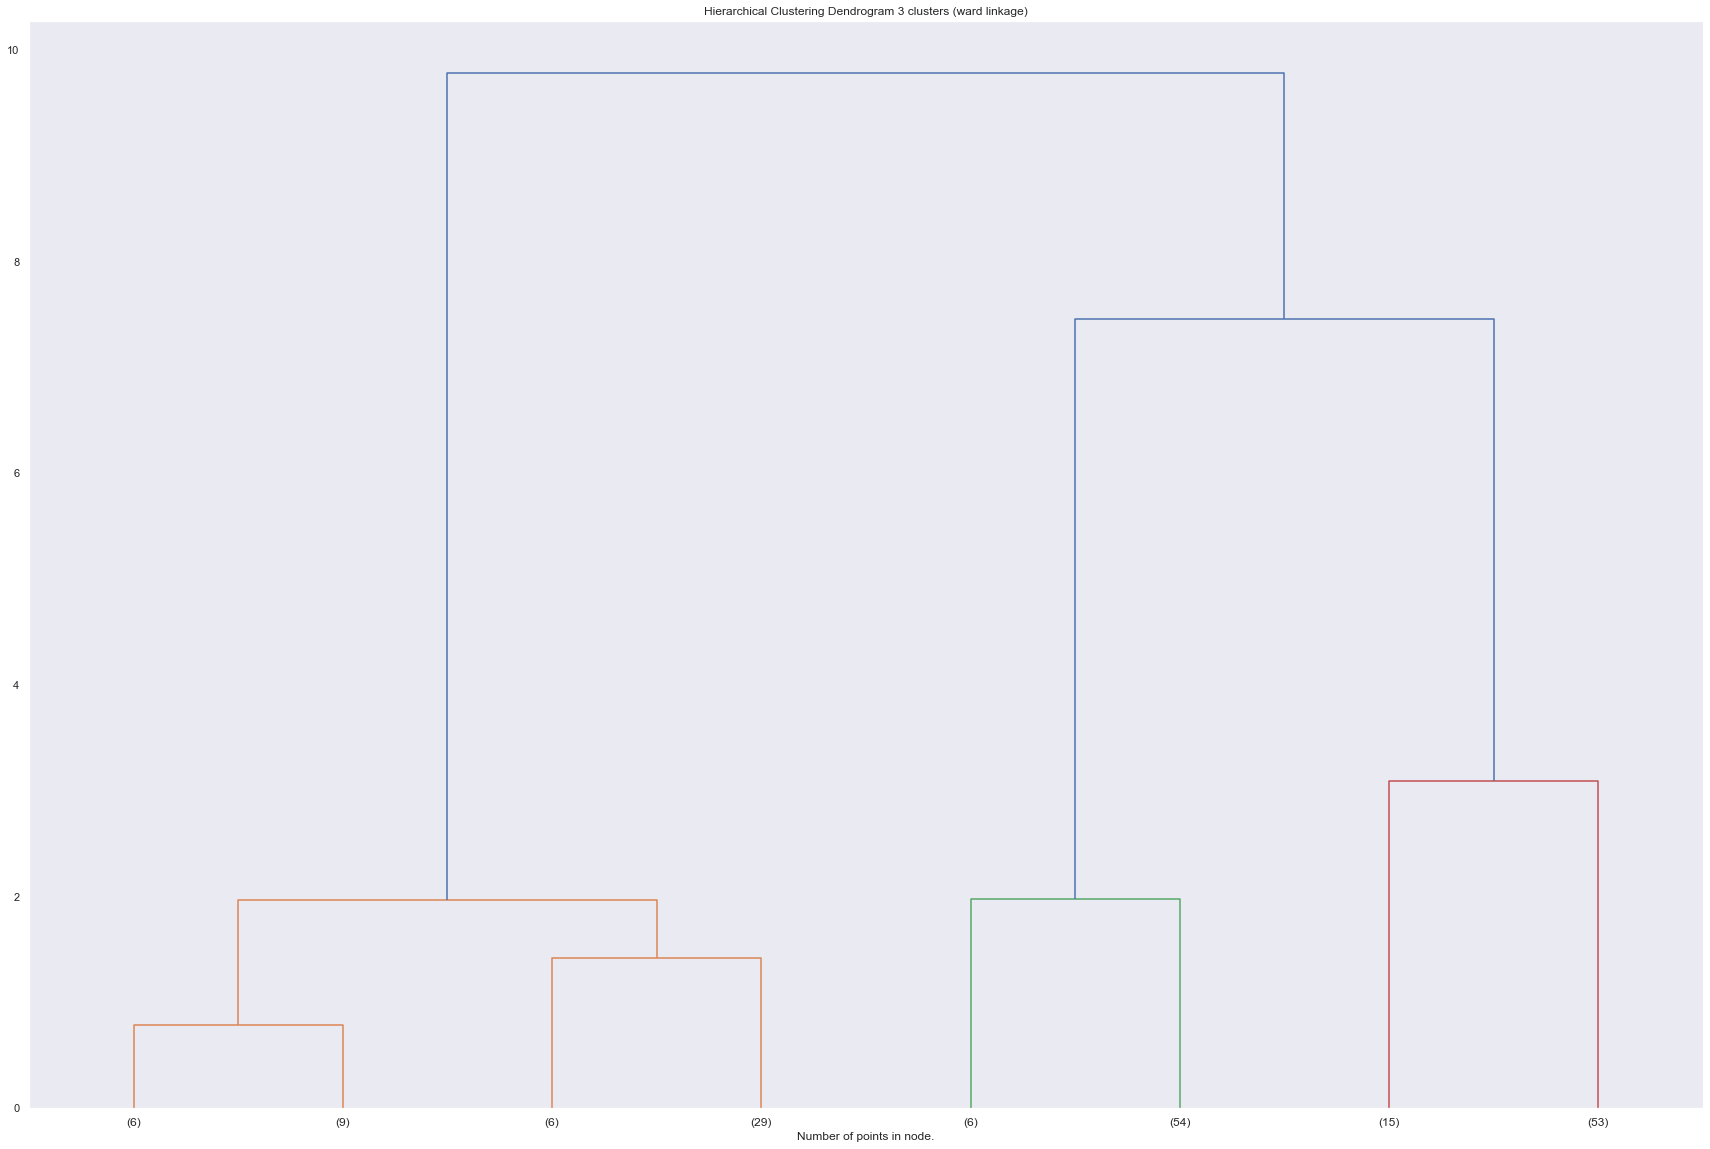

In [182]:
plt.title("Hierarchical Clustering Dendrogram 3 clusters (ward linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=2)
plt.xlabel("Number of points in node.")
plt.show()

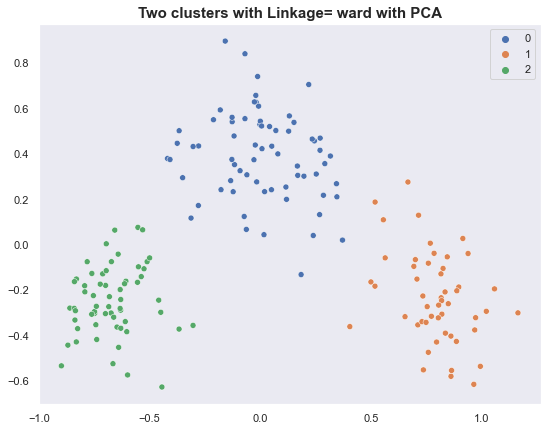

In [183]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=pca_values[:,0], y=pca_values[:,1],palette="deep")
plt.title("Two clusters with Linkage= ward with PCA",fontsize=15,fontweight="bold")
plt.show()

##### K Means Clustering on PCA data

In [184]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=3, random_state=2)
kmeans.fit(pca_values)
labels_ = kmeans.predict(pca_values)

In [185]:
# Data points spread
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [186]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 50],
       [ 1, 60],
       [ 2, 68]], dtype=int64)

distribution across clusters is the same as without PCA

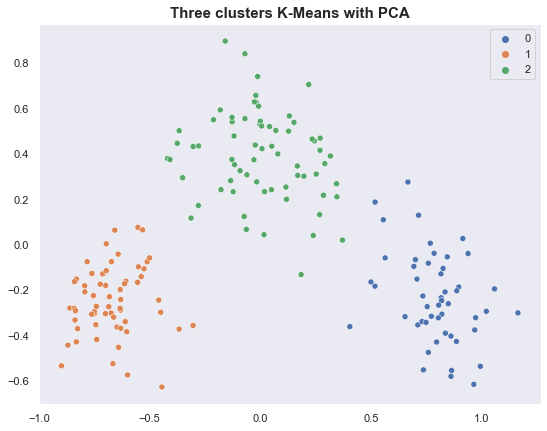

In [187]:
# Transform data to visualize data in 2d
sns.set_style('dark')
plt.figure(figsize=(9,7))
sns.scatterplot(hue=kmeans.labels_, x=pca_values[:,0], y=pca_values[:,1],palette="deep")
plt.title("Three clusters K-Means with PCA",fontsize=15,fontweight="bold")
plt.show()

**Conclusion**:   
* We did not observe any significant change in the clusters after PCA. The computational cost reduced as we reduced    
* 14 columns to 3 columns without significant data loss (75% explained variance)   

In [188]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.48546616, 0.1745557 , 0.09281308])